In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("1madfhantr.csv")
print("Dataset loaded successfully")
df.head()

Dataset loaded successfully


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df = df.fillna(df.mode().iloc[0]) 

In [5]:
le = LabelEncoder()
for col in ['Gender', 'Married', 'Education', 'Self_Employed', 
            'Property_Area', 'Loan_Status', 'Dependents']:
    df[col] = le.fit_transform(df[col])

print("\n✅ Label Encoding Done!")


✅ Label Encoding Done!


In [6]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area']]

y = df['Loan_Status']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\n✅ Data Split Done! (70% Train, 30% Test)")


✅ Data Split Done! (70% Train, 30% Test)


In [8]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

print("\n✅ Decision Tree Model Trained Successfully!")



✅ Decision Tree Model Trained Successfully!


In [9]:
y_pred = model.predict(X_test)

In [10]:
acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Model Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))


🎯 Model Accuracy: 69.73%

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.48      0.53        65
           1       0.74      0.82      0.78       120

    accuracy                           0.70       185
   macro avg       0.66      0.65      0.65       185
weighted avg       0.69      0.70      0.69       185



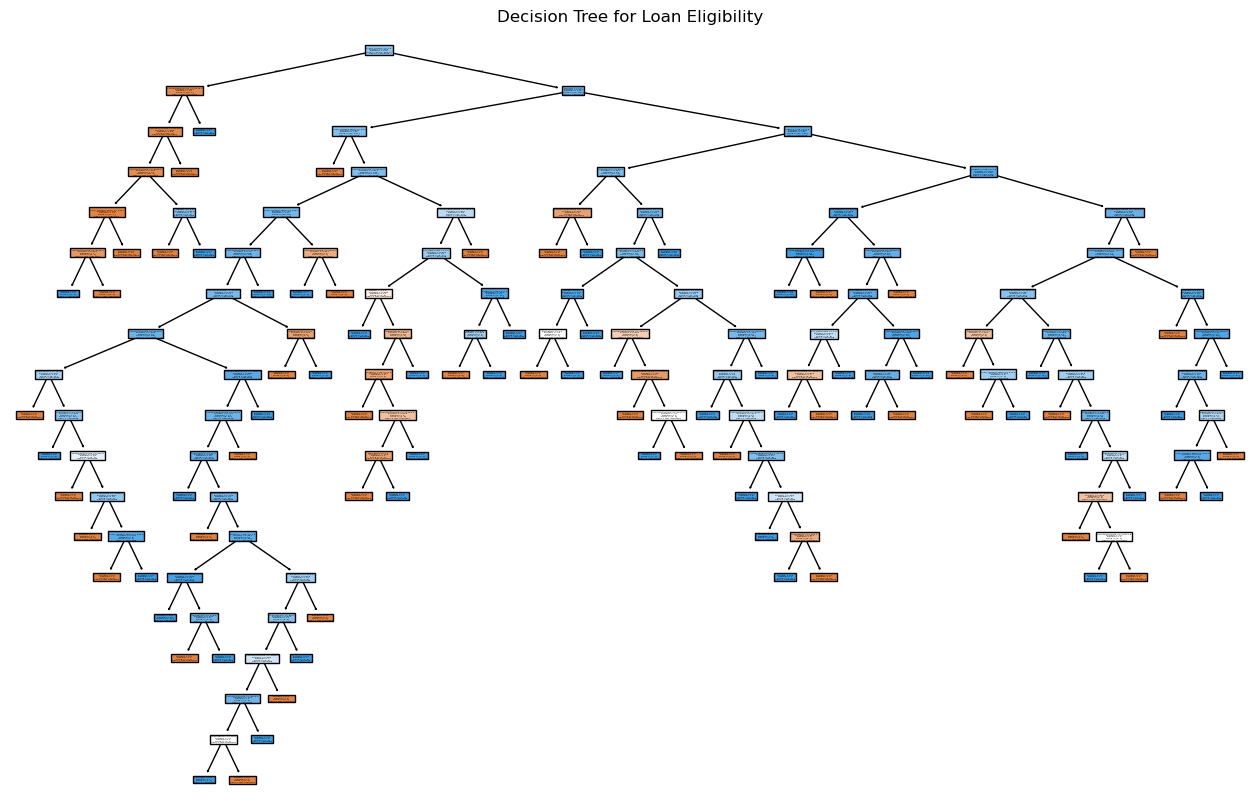

In [11]:
plt.figure(figsize=(16, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Approved', 'Approved'])
plt.title("Decision Tree for Loan Eligibility")
plt.show()